In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn
!pip install pandas
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os
from datetime import datetime

In [4]:
dataset = pd.read_csv('wind_dataset.csv')
dataset 

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [5]:
dataset.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'],format='%d %m %Y %H:%M')
dataset['year'] = dataset['Date/Time'].dt.year 
dataset['month'] = dataset['Date/Time'].dt.month 
dataset['day'] = dataset['Date/Time'].dt.day
dataset['Hour'] = dataset['Date/Time'].dt.hour 
dataset['minute'] = dataset['Date/Time'].dt.minute
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [7]:
def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [8]:
dataset['meanSpeed']=dataset['WindSpeed(m/s)'].apply(mean_speed)
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5


In [9]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [10]:
dataset["meanDirection"]=dataset["WindDirection"].apply(mean_direction)
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270


In [11]:
directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]

In [12]:
dataset['windCDirection']=dataset['WindDirection'].apply(wind_direction)
dataset.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection,windCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,N
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5,240,N
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5,210,N
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5,240,N
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5,240,N


In [13]:
dataset['windCDirection']=dataset['WindDirection'].apply(wind_direction)
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection,windCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,N
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,N


In [14]:
X = dataset[['WindDirection', 'month', 'day', 'Hour', 'meanSpeed']]
X

,WindDirection,month,day,Hour,meanSpeed
0,259.994904,1,1,0,5.5
1,268.641113,1,1,0,5.5
2,272.564789,1,1,0,5.0
3,271.258087,1,1,0,5.5
4,265.674286,1,1,0,5.5
...,...,...,...,...,...
50525,80.502724,12,31,23,11.5
50526,84.062599,12,31,23,7.5
50527,84.742500,12,31,23,8.5
50528,84.297913,12,31,23,9.5


In [15]:
Y = dataset['ActivePower(kW)']
Y

0         380.047791
1         453.769196
2         306.376587
3         419.645904
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: ActivePower(kW), Length: 50530, dtype: float64

In [16]:
!pip install scikit-learn

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
import joblib

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.02)

In [19]:
#Initializing RandomForestRegressor model
random_forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 42)
model = random_forest_regressor.fit(X_train, Y_train)

In [20]:
pred_train_rfr= random_forest_regressor.predict(X_train)
print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(Y_train, pred_train_rfr)))
print(r2_score(Y_train, pred_train_rfr))

pred_test_rfr= random_forest_regressor.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(Y_test,pred_test_rfr))) 
print(r2_score(Y_test, pred_test_rfr))

print('The training r_sq is: %.2f'%model.score(X_train, Y_train))
print('The testing r_sq is: %.2f'%model.score(X_test, Y_test))

Training RMSE and R2 score:
73.2613005728539
0.9968823411503575
Testing RMSE and R2 score:
190.85355518475907
0.9793988177297009
The training r_sq is: 1.00
The testing r_sq is: 0.98


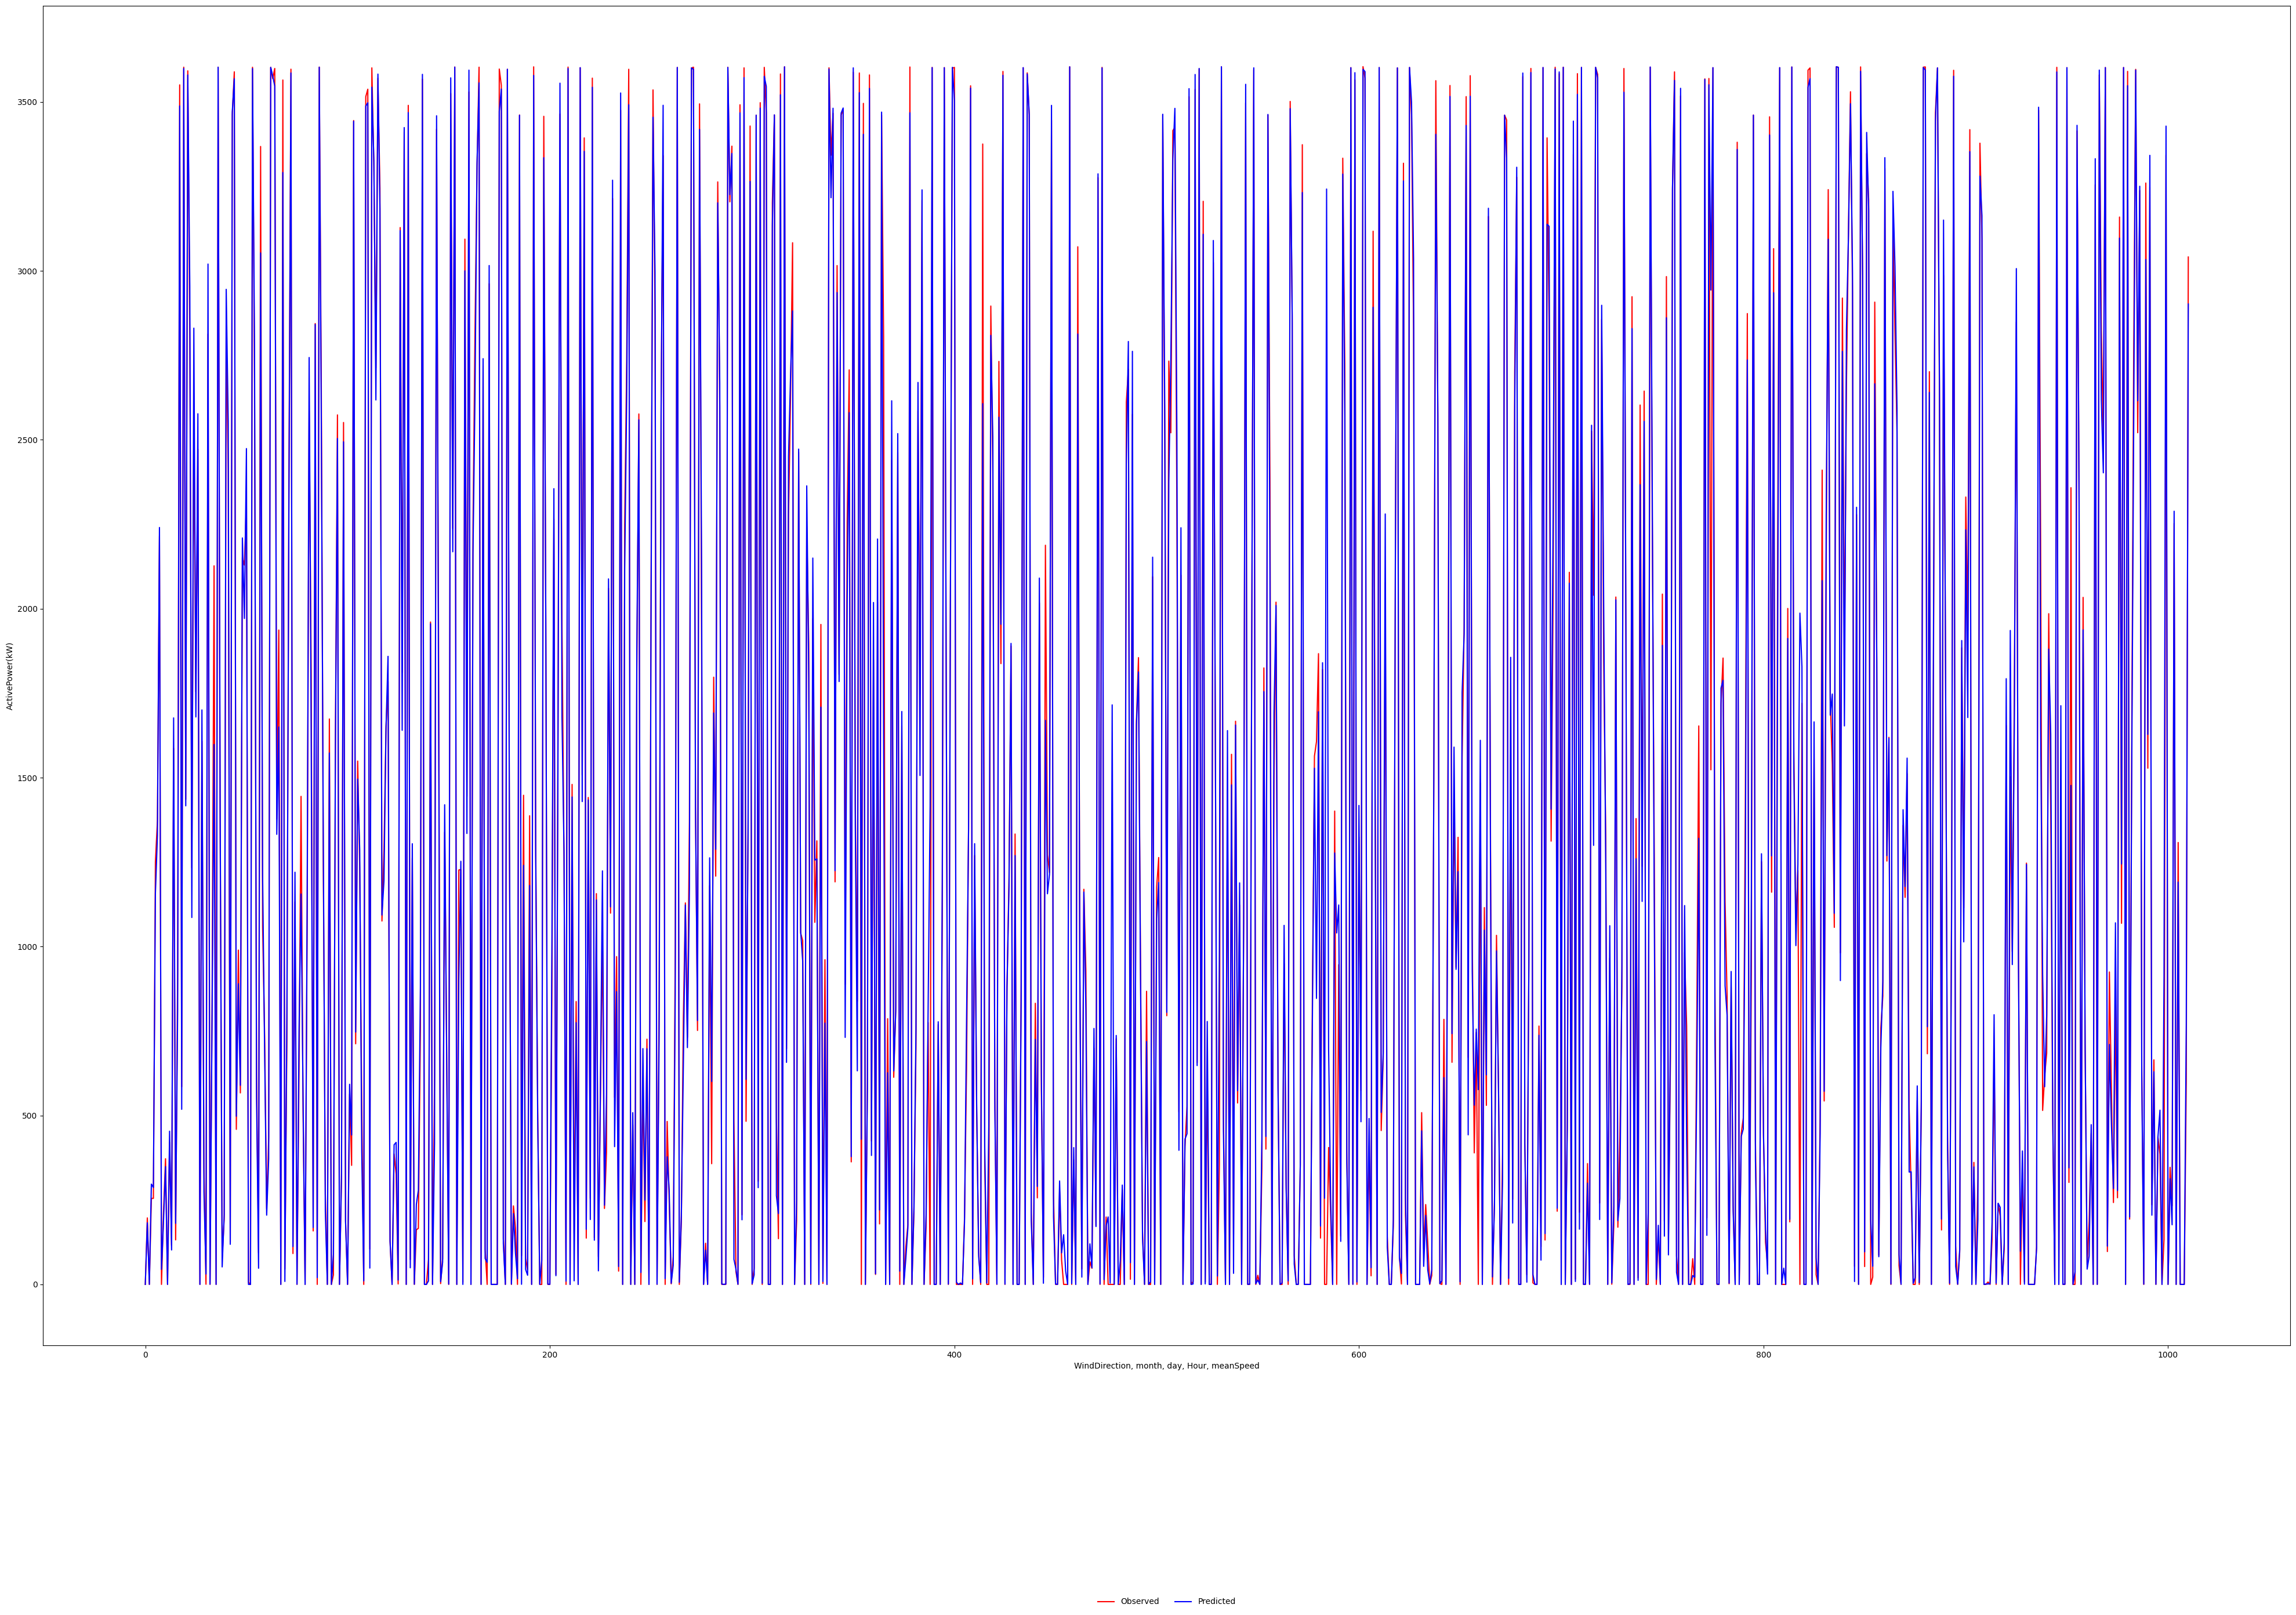

In [21]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and and parameters
plt.rcParams['figure.figsize'] = (50,30)
x_axis = range(len(X_test))
#Plotting
plt.plot(x_axis, Y_test, label='Observed', color='r', linestyle='solid')
plt.plot(x_axis, pred_test_rfr, label='Predicted', color='b', linestyle='solid')
plt.ylabel('ActivePower(kW)')
plt.xlabel('WindDirection, month, day, Hour, meanSpeed')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)

In [22]:
print('Prediction of wind power for these input parameters: ', model.predict([[254.65,6,1,23,5.7]]))

Prediction of wind power for these input parameters:  [336.92368241]


In [23]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("trained_model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()